# Composite IMF (cIMF) and IGIMF sampling

The code provided in this notebook allows to generate custom composite IMF (cIMF) and IGIMF samples via optimal sampling. In order to understand the written code, it is advised to first read the files IMF_sampling.ipynb and ECMF_sampling.ipynb as this notebook simply combines the code of those. \
For a deeper understanding of the IGIMF Theory and especially the Optimal sampling algorithm and the modifications applied to it, read the supplementary document. 

## Theoretical background

[Kroupa & Weidner (2003)](https://iopscience.iop.org/article/10.1086/379105) were the first to point out that the fact that stars primarily form in star clusters predicts that the galactic-field IMF is the sum of all the stellar IMFs.
The **integrated galactic IMF (IGIMF)** as the integral over all stellar IMFs is given as
$$
\begin{aligned}
	\xi_{\mathrm{IGIMF}}(m)=\int_{M_{\mathrm{ecl,min}}}^{M_{\mathrm{ecl,max}}} \xi(m \leq m_{\mathrm{max}}) \xi_{\mathrm{ecl}}(M_{\mathrm{ecl}}) \ dM_{\mathrm{ecl}}
\end{aligned}
$$
with $\xi_{\mathrm{ecl}}$ the ECMF and $\xi(m \leq m_{\mathrm{max}})$ the stellar IMF of a particular cluster with $m_{\mathrm{max}}$ the maximum stellar mass within this cluster. $M_{\mathrm{ecl,max}}$ is the most massive cluster mass.\
Note that this is the general formulation of the IGIMF. When performing Optimal sampling, the meaning of each parameter needs to be treated with more nuance. E.g. $M_{\mathrm{ecl,max}}$ is then not an actual physical value but only an integration limit.

In a discrete description, the IGIMF is the sum of all stellar IMFs. It is the composite IMF of a whole galaxy.

## Distinction to the galIMF module

The provided code can be used to sample (custom) composite IMFs and IGIMFs. The reference for this code is the [galIMF](https://github.com/Azeret/galIMF) module, which was also used for the creation of this work. Since it is oriented on the IGIMF Theory, it uses the total stellar mass formed inside a whole galaxy $M_{\mathrm{tot}}$ as input for the sampling algorithm. \
The main special feature in comparison to the galIMF module is that it is possible to give the mass of the most massive cluster $M_1$ as a direct input in order to sample custom cIMFs. This should in principle also be possible within the galIMF module by manipulation of the $I_{\mathrm{ecl}}$ parameter but it is likely more easily to understand and access in this direct formulation. 

The other distinction to the galIMF code is that stellar masses are sampled directly and not in the form of histograms. This can be useful to set up dynamical simulations or fitting model functions on the generated data. A useful addition in the future could be to add a formalism to directly determine the number of data points per mass bin, as in the galIMF module. However, the current code appears sufficient for the intended use at present.

## Important note

When sampling custom cIMFs, i.e. when using $M_1$ as (additional) input, it is important to keep in mind that the results one draws from such samples are **not** directly compatible with the IGIMF Theory. It is rather a tool to generate samples which can be used to study star-formation on sub-galactic scales and does not represent an extension of the existing IGIMF framework.


## Inputs for the most important IMF and ECMF models:

In order to sample cIMFs one needs to choose an IMF model (the alpha_i_models), an ECMF model (beta_model), enter the mean star formation rate (SFR) over a 10 Myr timespan, the metallicity as $[Z]$ and either the mass of the most massive cluster (M_1), the total mass of stars formed (M_tot=SFR*10Myr) or both as input. If only one is desired to be used, set the other equal to zero. 

For a canonical IMF use: alpha_1_model=0, alpha_2_model=0, alpha_3_model=0 \
For a varying IMF after [Yan et al. (2021)](https://www.aanda.org/articles/aa/full_html/2021/11/aa40683-21/aa40683-21.html) use: alpha_1_model='Z', alpha_2_model='Z', alpha_3_model=2

For a canonical ECMF use: beta_model=0 \
For a varying ECMF after [Weidner et al. (2013)](https://academic.oup.com/mnras/article/436/4/3309/986420) use: beta_model=2 

## Case distinction

The provided code allows to generate IGIMF samples, as well as custom cIMF samples. It is now shortly explained what inputs are needed for each case and for what applications each case has. 

### Sampling IGIMFs using the IGIMF Theory

When the goal is to model an IGIMF based on the IGIMF Theory, set M_1=0 and use M_tot=SFR*10Myr as input. The code will then rely on the physical upper limit of cluster mass $M_U=10^9\,M_{\odot}$ used in the IGIMF Theory to determine the most massive cluster mass.

### Sampling custom cIMFs

Optimally sampling custom IMFs can have many uses. The most general being to test, whether and which differences arise on sub-galactic scales, when treating star-formation as highly self-regulated process (i.e. using Optimal Sampling as in this work) compared to a stochastic process, represented by random sampling.

When the goal is to model a (custom) composite IMF where the mass of the most massive cluster $M_1$ a and the mass of the region you want to model ($M_{\mathrm{tot}}$) are given, use an $M_1\neq0$ and $M_{\mathrm{tot}}\neq0$.\
This algorithm can be useful for the study of composite IMFs of star-forming regions. Varying IMFs can allow for example top-heavy cIMFs in strongly star-forming regions. Also, it can be used to investigate e.g. the form of local ECMFs and their dependence on environment. \
Lastly, it could be used to try to find a new empirical ECMF function, where fits to galaxy-wide IMFs are made using empirical fits to $M_1-SFR$ relations as starting point.

When the goal is to only use the the mass of the most massive cluster $M_1$ as input, set $M_{\mathrm{tot}}=0$. \
This case may be useful for sub-galactic systems, e.g. star-forming regions, where the most massive cluster in a certain region is known, as well as the local ECMF slope, but the mass of the region is uncertain. It could also be used to investigate how the physical upper limit $M_U$ could be modified for sub-galactic regions to fit local relations between total mass and most massive cluster mass.

Be aware that, while it is possible to use the modified algorithm (i.e., whenever you use $M_1$ as input) also to simulate IGIMFs, this leads to inconsistencies with the IGIMF Theory as e.g. Weidner et al.'s ECMF fit uses the optimal sampling normalization condition ($I_{\mathrm{ecl}}=1$) to gauge their ECMF function. \
The modified algorithm may be useful also for IGIMFs, if in the future formulations of the IGIMF Theory are pursued that use empirical $M_1-SFR$ relations as starting point. But keep in mind that this requires a new self-consistent framework and e.g. a new ECMF function. \
Therefore, for the time being it is strongly advised to only use the modified algorithm to sample custom cIMFs in order to study star-formation on sub-galactic scales.

## Suggested use and final notes:

The code is most useful to generate stellar masses for IGIMFs and cIMFs for (local) SFRs of $< 1\, M_{\odot}/\mathrm{yr}$. This is due to the code having a rather long runtime if all stellar masses shall be determined. If only the high-mass end is of interest, it is suggested to modify the code such that the IMF sampling stops before sampling all low-mass stars as their sampling takes up the most runtime. \
This can be done e.g. by adding an *if* condition with a *break* command, in the *draw_imf* function.

### Custom cIMFs with the galIMF code for large SFRs

For very large SFRs it is not advised to draw the stellar masses one by one. Instead one can use the already existing algorithm for fast computation of the number of stars per mass bin in the galIMF module.

As stated before, it should also be possible to generate custom cIMFs with the galIMF module. In order to do this, you simply need to find the m_max value for the input cluster mass $M_1$ and $M_{\mathrm{tot}}$, which can be easily done using the provided functions (*find_m_ecl_max...*) in this notebook, and calculate the integral of the ECMF function over the range [M_ecl_max, M_U]. This then gives the new normalization condition $I_{\mathrm{ecl}}'$, that you can put in the galimf function.

In mathematical terms:

$$
\begin{aligned}
	I_{\mathrm{ecl}}'=\int_{M_{\mathrm{ecl,max}}}^{M_{\mathrm{U,ecl}}} \xi_{\mathrm{ecl}}(M_{\mathrm{ecl}}) \ dM_{\mathrm{ecl}}
\end{aligned}
$$

In [1]:
### This function can optimally sample the Integrated Galactic Initial Mass Function (IGIMF)
### as well as custom composite IMFs (cIMFs) 

from scipy.optimize import root_scalar
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate


def draw_cIMF(alpha_1_model, alpha_2_model, alpha_3_model, beta_model, SFR, M_over_H, M_1, M_tot):

    ### alpha_1_model is the model for the IMF power-index for M_str_L < M < M_turn
    ### alpha_2_model is the model for the IMF power-index for M_turn < M < M_turn2
    ### alpha_3_model is the model for the IMF power-index for M_turn2 < M < M_str_U
    ### beta_model is the model for the ECMF power-index (values between 1<beta<3 can be chosen arbitrarily as well)
    ### SFR is the star formation rate of the region in solar masses per year
    ### M_over_H is the metallicity of the region [Z]=log10(Z/Z_solar)
    ### M_1 is the stellar mass of the most massive cluster in the region in solar masses
    ### M_tot is the total stellar mass of the region in solar masses (when unknown, just set it equal 0)

    ### Sampling from the ECMF
    ### The ECMF is the Embedded Cluster Mass Function, which is the mass function of star clusters

    ### First some functions are defined that are needed to sample from the ECMF

    ### distinguish between the cases of beta=2 and beta unequal 2

    ## beta-model function imported from galimf.py
    def function_beta_change(beta_model, SFR, M_over_H):
        if (beta_model == 0):
            default_beta = 2.00000001
            return default_beta
        elif (beta_model == 1):
            beta_change = -0.106 * math.log(SFR, 10) + 2.000001 #+ 0.5*M_over_H
            if beta_change < 1.5:
                beta_change = 1.5
            elif beta_change > 2.5:
                beta_change = 2.5
            # print("ECMF-beta =", beta_change)
            return beta_change
        elif (beta_model == 2):
            ### changed so there, don't occur any math errors
            if SFR > 1:
                beta_change = -0.106 * math.log(SFR, 10) + 2.00000001
            else:
                beta_change = 2.0000001
            return beta_change
        elif (beta_model == 3):
            beta_change = 1.4
            return beta_change
        else:
            return beta_model
        

    ########################################################################################

    ### Find upper integration limit m_ecl_max for the embedded cluster mass function
    ### using only the total mass of the region (M_tot) as input

    ### Find Mecl,max for beta=2

    def find_m_ecl_max_beq2_M_tot(M_tot):
        M_ecl_L = 5.0  # embedded cluster mass lower limit [solar mass]
        M_ecl_U = 1e9  # embdedded cluster mass upper limit [solar mass]

        I_ecl = 1.0 # normalization factor for the embedded cluster mass function

        def M_ecl_max(M_ecl_max):
            M_theo=I_ecl*(math.log(M_ecl_max)-math.log(M_ecl_L))/(M_ecl_max**(-1)-M_ecl_U**(-1))
            return M_tot-M_theo
        
        sol = root_scalar(M_ecl_max, bracket=[M_ecl_L, 0.9999*M_ecl_U])
        m_ecl_max = sol.root
        return m_ecl_max


    ### Find Mecl,max for beta unequal 2

    def find_m_ecl_max_buneq2_M_tot(M_tot, beta_model, SFR, M_over_H):
        M_ecl_L = 5.0  # embedded cluster mass lower limit [solar mass]
        M_ecl_U = 1e9  # embdedded cluster mass upper limit [solar mass]

        I_ecl = 1.0 # normalization factor for the embedded cluster mass function

        beta=function_beta_change(beta_model, SFR, M_over_H)

        def M_ecl_max(M_ecl_max):
            M_theo=I_ecl*(1-beta)/(2-beta)*(M_ecl_max**(2-beta)-M_ecl_L**(2-beta))/(M_ecl_U**(1-beta)-M_ecl_max**(1-beta))
            return M_tot-M_theo
        
        sol = root_scalar(M_ecl_max, bracket=[M_ecl_L, 0.9999*M_ecl_U])
        m_ecl_max = sol.root
        return m_ecl_max


    ### ECMF function*m with prefactor. Can be used to determine Masses M_ecl_i
    def model_ecmf_m(m_ecl, beta_model, SFR, M_over_H, kecl):
        M_ecl_L = 5.0  # star mass lower limit [solar mass]
        M_ecl_U = 1e9  # star mass upper limit [solar mass]

        ### kecl is the prefactor for the ECMF
        beta=function_beta_change(beta_model, SFR, M_over_H)

        if m_ecl < M_ecl_L:
            return 0
        if M_ecl_L < m_ecl < M_ecl_U:
            return kecl*m_ecl**(1-beta)
        if m_ecl > M_ecl_U:
            return 0
        
    ########################################################################################

    ### Drawing from ecmf with M_tot as an input.

    ### drawing from ecmf with M_tot as an input

    def draw_ecmf_M_tot(M_tot,beta_model,SFR,M_over_H):
        M_ecl_L = 5.0  # star mass lower limit [solar mass]
        M_ecl_U = 1e9  # star mass upper limit [solar mass]
        I_ecl=1. #normalization factor in the Optimal Sampling condition equation (says that integral from m_ecl_max to M_ecl_U of IMF is equal to 1; one star in that mass range)
        ## I_str = scipy.integrate.quad(function_IMF(m), M_max, M_str_U)[0]

        ## slope beta of the ECMF, dependent on model
        beta=function_beta_change(beta_model, SFR, M_over_H)


        ## find m_ecl_max by using root_scalar
        ## m_ecl_max=m_1 is the upper integration limit for the most massive cluster in a region
        ## It is NOT the mass of the most massive cluster!

        ## upper integration limit for region/galaxy of mass M_tot is found by using the Optimal Sampling condition

        ## distinguish between cases of beta being equal to 2 or unequal to 2
        ## also the normalization constant of the ECMF, kecl, is determined here 

        if beta_model==0:
            m_ecl_max=find_m_ecl_max_beq2_M_tot(M_tot)
            kecl=I_ecl*(1-beta)/(M_ecl_U**(1-beta)-m_ecl_max**(1-beta))

        elif beta_model!=0:
            
            m_ecl_max=find_m_ecl_max_buneq2_M_tot(M_tot, beta_model, SFR, M_over_H)
            kecl=I_ecl*(1-beta)/(M_ecl_U**(1-beta)-m_ecl_max**(1-beta))

        m_i=m_ecl_max


        ### m_i and m_i+1 are not the cluster masses, but only the upper and lower limits of the mass intervals
        ### from which the masses M_i are drawn

        ### draw all other clusters with the conditions stated in supplementary document
        ### m_i_array is the array of all integration limits for the clusters in the region
        m_i_array = np.array([])
        m_i_array=np.append(m_i_array,m_i)

        ### Array for all Masses M_i that are drawn with help of the integration limits m_i
        M_i_array = np.array([])

        ### Masses M_i are determined by integral from m_i+1 to m_i over m*ECMF(m)

        ## let loop run while the lower integration limit is larger than M_str_L
        while m_i > M_ecl_L:
            

            ## General idea: m_i is known, m_i+1 is ought to be found
            ## For this the formulas given in the galIMF modules supplementary.pdf file can be used
            ## One can calculate m_i+1 with the conditions stated in the supplementary document

            ## Code calculates the m_i+1 for given conditions on m_i

            m_i_1=(m_i**(1-beta)-(1-beta)/(kecl))**(1/(1-beta))

            if M_ecl_L < m_i_1 < m_i < M_ecl_U:
                m_i_array=np.append(m_i_array,m_i_1)
                ### with calculated m_i+1, the mass M_i can be determined by integrating the IMF from m_i+1 to m_i
                M_i= (scipy.integrate.quad(model_ecmf_m, m_i_1, m_i, args=(beta_model, SFR, M_over_H, kecl))[0])
                M_i_array=np.append(M_i_array,M_i)
                # print(M_i)
                m_i=m_i_1

            elif m_i_1 < M_ecl_L:
                    print("All clusters drawn")
                    break

        ### Total mass drawn from the ECMF
        totalmass = np.sum(M_i_array)
        ### Number of clusters drawn from the ECMF
        num_clusters = len(M_i_array)

        ## return the arrays of integration limits and masses, the total mass and the number of clusters
        return m_i_array, M_i_array, totalmass, num_clusters, kecl, beta
    
    ########################################################################################

    ### Find upper integration limit m_ecl_max for the embedded cluster mass function
    ### Needs the mass of the most massive cluster M_1 as input

    ### Find Mecl,max for the case of beta=2

    def find_m_ecl_max_beq2_M1(M_1):
        M_ecl_L = 5.0  # embedded cluster mass lower limit [solar mass]
        M_ecl_U = 1e9  # embdedded cluster mass upper limit [solar mass]

        I_ecl = 1.0 # normalization factor for the embedded cluster mass function

        def M_ecl_max(M_ecl_max):
            ## equation 8
            kecl=I_ecl/(M_ecl_max**(-1)-M_ecl_U**(-1))
            ## equation 7
            eq1=M_ecl_max*np.exp(-M_1/kecl)
            ## equation 9
            eq2=(M_ecl_max**(-1)+1/kecl)**(-1)
            return eq1-eq2
        
        sol = root_scalar(M_ecl_max, bracket=[M_ecl_L, 0.9999*M_ecl_U])
        m_ecl_max = sol.root
        return m_ecl_max


    ### Find Mecl,max for beta unequal 2

    def find_m_ecl_max_buneq2_M1(M_1,beta):
        M_ecl_L = 5.0  # embedded cluster mass lower limit [solar mass]
        M_ecl_U = 1e9  # embdedded cluster mass upper limit [solar mass]

        I_ecl = 1.0 # normalization factor for the embedded cluster mass function

        def M_ecl_max(M_ecl_max):  
            ### have to plug in kecl directly to avoid root_scalar failing for small values
            ## equation 1 from my notes
            eq1=(M_ecl_max**(2.0-beta)-((2.0-beta)/(I_ecl*(1.0-beta)))*(M_1)*(M_ecl_U**(1.0-beta)-M_ecl_max**(1.0-beta)))
            ## equation 3 from my notes
            eq2=(M_ecl_max**(1-beta)-(1-beta)/(I_ecl*(1.0-beta)/(M_ecl_U**(1.0-beta)-M_ecl_max**(1.0-beta))))**((2-beta)/(1-beta))
            return eq1-eq2
        
        sol = root_scalar(M_ecl_max, bracket=[M_ecl_L, 0.9999*M_ecl_U])
        m_ecl_max = sol.root
        return m_ecl_max

    ### ECMF function*m with normalization kecl. Can be used to determine Masses M_ecl_i
    def model_ecmf_m(m_ecl, beta_model, SFR, M_over_H, kecl):
        M_ecl_L = 5.0  # star mass lower limit [solar mass]
        M_ecl_U = 1e9  # star mass upper limit [solar mass]
        
        ### kecl is the normalization for the ECMF
        beta=function_beta_change(beta_model, SFR, M_over_H)

        if m_ecl < M_ecl_L:
            return 0
        if M_ecl_L < m_ecl < M_ecl_U:
            return kecl*m_ecl**(1-beta)
        if m_ecl > M_ecl_U:
            return 0
        
    ########################################################################################

    ### Drawing from ecmf with M_1 as an input. 
    ### M_1 is the mass of the most massive cluster in a region

    def draw_ecmf_M_1(M_1,beta_model,SFR,M_over_H):

        ## check if M_1 is larger than 5 solar masses
        if M_1 < 5:
            print("M_1 is too small. Please enter a value larger than 5.0 solar masses.")
            return
        
        ## More than one cluster can only be drawn for M_1 > 10.5 solar masses (approximately)

        ## lower and upper limits for the star mass
        M_ecl_L = 5.0  # star mass lower limit [solar mass]
        M_ecl_U = 1e9  # star mass upper limit [solar mass]
        I_ecl=1. #normalization factor in the Optimal Sampling condition equation (says that integral from m_ecl_max to M_ecl_U of IMF is equal to 1; one star in that mass range)

        ## slope beta of the ECMF, dependent on model
        beta=function_beta_change(beta_model, SFR, M_over_H)


        ## find m_ecl_max by using root_scalar
        ## m_ecl_max=m_1 is the upper integration limit for the most massive cluster in a region
        ## It is NOT the mass of the most massive cluster!

        ## upper integration limit for region/galaxy of mass M_tot is found by using the Optimal Sampling condition

        ## distinguish between cases of beta being equal to 2 or unequal to 2
        ## The theoretical value of M_tot is calculated directly for comparison

        if beta_model==0:
            
            m_ecl_max=find_m_ecl_max_beq2_M1(M_1)
            kecl=I_ecl*(1.0-beta)/(M_ecl_U**(1.0-beta)-m_ecl_max**(1.0-beta))

            M_tot_theo=kecl*(np.log(m_ecl_max)-np.log(M_ecl_L))
            print('M_tot,theo=',M_tot_theo)

        elif beta_model==1:
            print('beta=1 is not implemented yet')

        elif beta_model==2 and SFR>1:
            
            m_ecl_max=find_m_ecl_max_buneq2_M1(M_1, beta)
            kecl=I_ecl*(1.0-beta)/(M_ecl_U**(1-beta)-m_ecl_max**(1.0-beta))

            M_tot_theo=kecl/(2.0-beta)*(m_ecl_max**(2.0-beta)-M_ecl_L**(2.0-beta))
            print('M_tot,theo=',M_tot_theo)

        elif beta_model==2 and SFR<=1:
            
            m_ecl_max=find_m_ecl_max_beq2_M1(M_1)
            kecl=I_ecl*(1.0-beta)/(M_ecl_U**(1.0-beta)-m_ecl_max**(1.0-beta))

            M_tot_theo=kecl*(np.log(m_ecl_max)-np.log(M_ecl_L))
            print('M_tot,theo=',M_tot_theo)

        elif beta_model==3:
            
            m_ecl_max=find_m_ecl_max_buneq2_M1(M_1, beta)
            kecl=I_ecl*(1.0-beta)/(M_ecl_U**(1-beta)-m_ecl_max**(1.0-beta))

            M_tot_theo=kecl/(2.0-beta)*(m_ecl_max**(2.0-beta)-M_ecl_L**(2.0-beta))
            print('M_tot,theo=',M_tot_theo)

        elif beta_model!=0 and beta_model!=1 and beta_model!=2 and beta_model!=3:
            
            m_ecl_max=find_m_ecl_max_buneq2_M1(M_1, beta)
            kecl=I_ecl*(1.0-beta)/(M_ecl_U**(1-beta)-m_ecl_max**(1.0-beta))

            M_tot_theo=kecl/(2.0-beta)*(m_ecl_max**(2.0-beta)-M_ecl_L**(2.0-beta))
            print('M_tot,theo=',M_tot_theo)


        #define determined upper integration limit m_ecl_max as the variable m_i
        m_i=m_ecl_max


        ### m_i and m_i+1 are not the cluster masses, but only the upper and lower limits of the mass intervals
        ### from which the masses M_i are drawn

        ### draw all other clusters with the conditions stated in supplementary document
        ### m_i_array is the array of all integration limits for the clusters in the region
        m_i_array = np.array([])
        m_i_array=np.append(m_i_array,m_i)

        ### Array for all Masses M_i that are drawn with help of the integration limits m_i
        M_i_array = np.array([])

        ### Masses M_i are determined by integral from m_i+1 to m_i over m*ECMF(m)

        ## let loop run while the lower integration limit is larger than M_str_L
        while m_i > M_ecl_L:

            ## Code calculates the m_i+1 for given conditions on m_i
            ## From the m_i+1, the mass M_i can be determined by integrating the ECMF from m_i+1 to m_i

            m_i_1=(m_i**(1-beta)-(1-beta)/(kecl))**(1/(1-beta))

            if M_ecl_L < m_i_1 < m_i < M_ecl_U:
                m_i_array=np.append(m_i_array,m_i_1)
                ### with calculated m_i+1, the mass M_i can be determined by integrating the IMF from m_i+1 to m_i
                M_i= (scipy.integrate.quad(model_ecmf_m, m_i_1, m_i, args=(beta_model, SFR, M_over_H, kecl))[0])
                M_i_array=np.append(M_i_array,M_i)
                m_i=m_i_1

            elif m_i_1 < M_ecl_L:
                    print("All clusters drawn")
                    break

        ### Total mass drawn from the ECMF
        totalmass = np.sum(M_i_array)
        ### Number of clusters drawn from the ECMF
        num_clusters = len(M_i_array)

        ## return the arrays of integration limits and masses, the total mass and the number of clusters
        return m_i_array, M_i_array, totalmass, num_clusters, kecl, beta
    
    ########################################################################################

    ### Drawing from the ecmf with M_1 and M_tot as input

    ## drawing M_ecl_max for the case that beta is unequal 2

    def find_m_ecl_max_buneq2_M1_Mtot(M_1,M_tot,beta):
        M_ecl_L = 5.0  # embedded cluster mass lower limit [solar mass]
        M_ecl_U = 1e9  # embdedded cluster mass upper limit [solar mass]


        def M_ecl_max(M_ecl_max):
            
            ### have to plug in kecl directly to avoid root_scalar failing for small values
            eq1=M_ecl_max**(2.0-beta)-((M_ecl_max**(2.0-beta)-M_ecl_L**(2.0-beta))/M_tot)*(M_1)
            #eq2=(M_ecl_max**(1-beta)-(1-beta)/(kecl))**((2-beta)/(1-beta))
            eq2=(M_ecl_max**(1.0-beta)-(1.0-beta)/(2.0-beta)*(M_ecl_max**(2.0-beta)-M_ecl_L**(2.0-beta))/(M_tot))**((2.0-beta)/(1.0-beta))
            return eq1-eq2
        
        sol = root_scalar(M_ecl_max, bracket=[M_ecl_L*1.0001, 0.9999*M_ecl_U])
        m_ecl_max = sol.root
        return m_ecl_max

    ## drawing M_ecl_max for the case that beta is equal 2

    def find_m_ecl_max_beq2_M1_Mtot(M_1,M_tot,beta):
        M_ecl_L = 5.0  # embedded cluster mass lower limit [solar mass]
        M_ecl_U = 1e9  # embdedded cluster mass upper limit [solar mass]


        def M_ecl_max(M_ecl_max):
            
            ### have to plug in kecl directly to avoid root_scalar failing for small values
            eq1=M_ecl_max*(M_ecl_max/M_ecl_L)**(-M_1/M_tot)
            eq2=(M_ecl_max**(1.0-beta)+(beta-1.0)/(M_tot)*np.log(M_ecl_max/M_ecl_L))**(1.0/(1.0-beta))
            return eq1-eq2
        
        sol = root_scalar(M_ecl_max, bracket=[M_ecl_L*1.0001, 0.9999*M_ecl_U])
        m_ecl_max = sol.root
        return m_ecl_max
    
    ########################################################################################

    ### drawing from ecmf with M_1 and M_tot as an input. 
    ### M_1 is the mass of the most massive cluster in a region

    def draw_ecmf_M_1_Mtot(M_1,M_tot,beta_model,SFR,M_over_H):

        ## check if M_1 is larger than 5 solar masses
        if M_1 < 5:
            print("M_1 is too small. Please enter a value larger than 5.0 solar masses.")
            return
        
        ## More than one cluster can only be drawn for M_1 > 10.5 solar masses (approximately)

        ## lower and upper limits for the star mass
        M_ecl_L = 5.0  # star mass lower limit [solar mass]
        M_ecl_U = 1e9  # star mass upper limit [solar mass]
        I_ecl=1. #normalization factor in the Optimal Sampling condition equation (says that integral from m_ecl_max to M_ecl_U of IMF is equal to 1; one star in that mass range)

        ## slope beta of the ECMF, dependent on model
        beta=function_beta_change(beta_model, SFR, M_over_H)

        ## find m_ecl_max by using root_scalar
        ## m_ecl_max=m_1 is the upper integration limit for the most massive cluster in a region
        ## It is NOT the mass of the most massive cluster!

        ## upper integration limit for region/galaxy of mass M_tot is found by using the Optimal Sampling condition

        ## distinguish between cases of beta being equal to 2 or unequal to 2

        if beta_model==0:
            m_ecl_max=find_m_ecl_max_beq2_M1_Mtot(M_1,M_tot,beta)
            kecl=M_tot/(np.log(m_ecl_max)-np.log(M_ecl_L))


        elif beta_model==1:
            print('beta=1 is not implemented yet')

        elif beta_model==2 and SFR>1:
            
            m_ecl_max=find_m_ecl_max_buneq2_M1_Mtot(M_1,M_tot, beta)
            kecl=(2.0-beta)*M_tot/(m_ecl_max**(2.0-beta)-M_ecl_L**(2.0-beta))

        elif beta_model==2 and SFR<=1:
            
            m_ecl_max=find_m_ecl_max_beq2_M1_Mtot(M_1,M_tot,beta)
            kecl=M_tot/(np.log(m_ecl_max)-np.log(M_ecl_L))

        elif beta_model==3:

            m_ecl_max=find_m_ecl_max_buneq2_M1_Mtot(M_1, M_tot, beta)
            kecl=(2.0-beta)*M_tot/(m_ecl_max**(2.0-beta)-M_ecl_L**(2.0-beta))

        elif beta_model!=0 and beta_model!=1 and beta_model!=2 and beta_model!=3:

            m_ecl_max=find_m_ecl_max_buneq2_M1_Mtot(M_1, M_tot, beta)
            kecl=(2.0-beta)*M_tot/(m_ecl_max**(2.0-beta)-M_ecl_L**(2.0-beta))


        m_i=m_ecl_max


        ### m_i and m_i+1 are not the cluster masses, but only the upper and lower limits of the mass intervals
        ### from which the masses M_i are drawn

        ### draw all other clusters with the conditions stated in supplementary document
        ### m_i_array is the array of all integration limits for the clusters in the region
        m_i_array = np.array([])
        m_i_array=np.append(m_i_array,m_i)


        ### Array for all Masses M_i that are drawn with help of the integration limits m_i
        M_i_array = np.array([])

        ### Masses M_i are determined by integral from m_i+1 to m_i over m*ECMF(m)

        ## let loop run while the lower integration limit is larger than M_str_L
        while m_i > M_ecl_L:

            ## Code calculates the m_i+1 for given conditions on m_i

            m_i_1=(m_i**(1-beta)-(1-beta)/(kecl))**(1/(1-beta))

            if M_ecl_L < m_i_1 < m_i < M_ecl_U:
                m_i_array=np.append(m_i_array,m_i_1)
                ### with calculated m_i+1, the mass M_i can be determined by integrating the IMF from m_i+1 to m_i
                M_i= (scipy.integrate.quad(model_ecmf_m, m_i_1, m_i, args=(beta_model, SFR, M_over_H, kecl))[0])
                M_i_array=np.append(M_i_array,M_i)
                m_i=m_i_1

            elif m_i_1 < M_ecl_L:
                    print("All clusters drawn")
                    break

        ### Total mass drawn from the ECMF
        totalmass = np.sum(M_i_array)
        ### Number of clusters drawn from the ECMF
        num_clusters = len(M_i_array)

        ## return the arrays of integration limits and masses, the total mass and the number of clusters
        return m_i_array, M_i_array, totalmass, num_clusters, kecl, beta
    
    ########################################################################################

    ### Drawing from the IMF using the drawn cluster masses M_i

    ### function alpha_1_change(alpha_1, alpha1_model, M_over_H) imported from galimf.py
    def function_alpha_1_change(alpha1_model, M_over_H):
        alpha_1 = 1.3
        if (alpha1_model == 0):
            return alpha_1
        elif (alpha1_model == 1):
            alpha_1_change = alpha_1 + 0.5 * M_over_H
            return alpha_1_change
        elif (alpha1_model == 'IGIMF2.5'):
            alpha_1_change = alpha_1 + 0.12 * M_over_H
            return alpha_1_change
        elif (alpha1_model == 'Z_MW'):
            alpha_1_change = alpha_1 + 79.4 * (10**M_over_H - 10**(-0.1)) * 0.0142
            return alpha_1_change
        elif (alpha1_model == 'Z'):
            alpha_1_change = alpha_1 + 63 * (10**M_over_H - 1) * 0.0142
            return alpha_1_change
        else:
            print('Invalid Input for alpha1 model')
            return

    ## Function to change alpha_2 depending on the model; imported from galimf.py
    def function_alpha_2_change(alpha2_model, M_over_H):
        alpha_2=2.3
        if (alpha2_model == 0):
            return alpha_2
        elif (alpha2_model == 1):
            alpha_2_change = alpha_2 + 0.5 * M_over_H
            return alpha_2_change
        elif (alpha2_model == 'Z_MW'):
            alpha_2_change = alpha_2 + 79.4 * (10**M_over_H - 10**(-0.1)) * 0.0142
            if M_over_H>1:
                print("Warning: Abnormally high gas metallicity leading to an unrealistic IMF shape according to the assumed variation law: alpha2_model == 'Z'. Please check your galaxy evolution settings or change to a different IMF variation assumption.")
            return alpha_2_change
        elif (alpha2_model == 'Z'):
            alpha_2_change = alpha_2 + 63 * (10**M_over_H - 1) * 0.0142
            if M_over_H>1:
                print("Warning: Abnormally high gas metallicity leading to an unrealistic IMF shape according to the assumed variation law: alpha2_model == 'Z'. Please check your galaxy evolution settings or change to a different IMF variation assumption.")
            return alpha_2_change
        elif (alpha2_model == 'IGIMF2.5'):
            alpha_2_change = alpha_2 + 0.12 * M_over_H
            return alpha_2_change
        elif (alpha2_model == 'R14'):
            alpha_2_change = 2.3 + 0.0572 * M_over_H
            return alpha_2_change
        else:
            print('Invalid input for alpha2 model')
            return

    ## Function to change alpha_3 depending on the model; imported from galimf.py
    def function_alpha_3_change(alpha3_model, M_ecl, M_over_H):
        ## M_ecl is the mass of the cluster
        ## M_over_H is the metallicity of the cluster, but apparently is in reality [Z]
        ## since the formula for model 2 is similar to the formula from Yan et al.(2021)
        ## where [Z] is used, I assume that M_over_H is actually [Z]
        ## alpha3_model is the model for the IMF power-index for M_turn2 < M < M_str_U
        if (alpha3_model == 0):
            default_alpha3 = 2.3
            # print("alpha_3 is set to be a constant: %s, as this is the default alpha_3 value for alpha3_model 0.\nFor more options regarding alpha_3 variation, please check file 'alpha3.py'" % (default_alpha3))
            return default_alpha3
        elif (alpha3_model == 1):
            rho = 10 ** (0.61 * math.log(M_ecl, 10) + 2.85)
            if rho < 9.5 * 10 ** 4:
                alpha_3_change = 2.3
            else:
                alpha_3_change = 1.86 - 0.43 * math.log(rho / 10 ** 6, 10)
            # print("Notification in file 'alpha3_model' uncompleted")
            if alpha_3_change < 0.5:
                print("IMF alpha_3 being", alpha_3_change, "out of the tested range from Marks et al. 2012.")
            return alpha_3_change
        elif (alpha3_model == 2):
            rho = 10 ** (0.61 * math.log(M_ecl, 10) + 2.85)
            x = -0.14 * M_over_H + 0.99 * math.log(rho / 10 ** 6, 10)
            if x < -0.87:
                alpha_3_change = 2.3
            else:
                alpha_3_change = -0.41 * x + 1.94
            # print("Notification in file 'alpha3_model' uncompleted")
            return alpha_3_change
        elif (alpha3_model == 'R14'):
            alpha_3_change = 2.3 + 0.0572 * M_over_H
            return alpha_3_change
        else:
            print('Invalid input for alpha_3 model')
            return alpha3_model


    ## Find m_max for a given M_ecl; m_max is the upper integration limit for the most massive star in the cluster
    ## m_max is NOT the mass of the most massive star in the cluster!

    ## Make finding m_max into a function
    ## M_ecl is the mass of the cluster 
    ## alpha_3_model is the model for the IMF power-index for M_turn2 < M < M_str_U
    ## M_over_H is the metallicity of the cluster

    def find_m_max(M_ecl, alpha_1_model, alpha_2_model, alpha_3_model, M_over_H):
        M_str_L = 0.08  # star mass lower limit [solar mass]
        M_str_U = 150.0  # star mass upper limit [solar mass]
        M_turn = 0.5  # IMF power-index breaking mass [solar mass]
        M_turn2 = 1.0  # IMF power-index breaking mass [solar mass]

        I = 1.0 ## I=I_str

        alpha_1 = function_alpha_1_change(alpha_1_model, M_over_H)  # IMF power-index for M_str_L < M < M_turn
        alpha_2 = function_alpha_2_change(alpha_2_model, M_over_H)  # IMF power-index for M_turn < M < M_turn2
        alpha_3 = function_alpha_3_change(alpha_3_model, M_ecl, M_over_H)  # IMF power-index for M_turn2 < M < M_str_U

        def Max(M_max):
            eq1 = M_ecl * M_str_U**(1-alpha_3) / (I * (1-alpha_3)) - M_turn2**(alpha_2-alpha_3) * M_turn**(alpha_1-alpha_2) / (2-alpha_1) * (M_turn**(2-alpha_1) - M_str_L**(2-alpha_1)) - M_turn2**(alpha_2-alpha_3) / (2-alpha_2) * (M_turn2**(2-alpha_2) - M_turn**(2-alpha_2)) + M_turn2**(2-alpha_3) / (2-alpha_3)
            eq2 = M_max**(2-alpha_3) / (2-alpha_3) + M_ecl * M_max**(1-alpha_3) / (I * (1-alpha_3))
            return eq1 - eq2
        
        sol = root_scalar(Max, bracket=[M_str_L, 0.9999*M_str_U])
        M_max = sol.root
        return M_max

    ### find m_max function for Mturn< m_max < Mturn_2 
    ###(only possible for lowest possible star cluster mass <2.72 solarmasses)
    def find_m_max_2(M_ecl, alpha_1_model, alpha_2_model, alpha_3_model, M_over_H):
        M_str_L = 0.08  # star mass lower limit [solar mass]
        M_str_U = 150.0  # star mass upper limit [solar mass]
        M_turn = 0.5  # IMF power-index breaking mass [solar mass]
        M_turn2 = 1.0  # IMF power-index breaking mass [solar mass]

        I = 1.0

        alpha_1 = function_alpha_1_change(alpha_1_model, M_over_H)  # IMF power-index for M_str_L < M < M_turn
        alpha_2 = function_alpha_2_change(alpha_2_model, M_over_H)  # IMF power-index for M_turn < M < M_turn2
        alpha_3 = function_alpha_3_change(alpha_3_model, M_ecl, M_over_H)  # IMF power-index for M_turn2 < M < M_str_U

        def Max_2(M_max):
            eq1 = M_max**(2-alpha_2)/(2-alpha_2)+M_ecl*M_max**(1-alpha_2)/(I*(1-alpha_2))
            eq2 = M_ecl*M_turn2**(1-alpha_2)/(I*(1-alpha_2))+M_ecl*M_turn2**(alpha_3-alpha_2)/(I*(1-alpha_3))*(M_str_U**(1-alpha_3)-M_turn2**(1-alpha_3))-M_turn**(alpha_1-alpha_2)/(2-alpha_1)*(M_turn**(2-alpha_1)-M_str_L**(2-alpha_1))+M_turn**(2-alpha_2)/(2-alpha_2)
            return eq1 - eq2
        
        sol = root_scalar(Max_2, bracket=[M_str_L, 0.9999*M_str_U])
        M_max = sol.root
        return M_max


    ### find m_max function for m_max < Mturn
    ### unrealistic for most cases, but still implemented
    def find_m_max_3(M_ecl, alpha_1_model, alpha_2_model, alpha_3_model, M_over_H):
        M_str_L = 0.08  # star mass lower limit [solar mass]
        M_str_U = 150.0  # star mass upper limit [solar mass]
        M_turn = 0.5  # IMF power-index breaking mass [solar mass]
        M_turn2 = 1.0  # IMF power-index breaking mass [solar mass]

        I = 1.0

        alpha_1 = function_alpha_1_change(alpha_1_model, M_over_H)  # IMF power-index for M_str_L < M < M_turn
        alpha_2 = function_alpha_2_change(alpha_2_model, M_over_H)  # IMF power-index for M_turn < M < M_turn2
        alpha_3 = function_alpha_3_change(alpha_3_model, M_ecl, M_over_H)  # IMF power-index for M_turn2 < M < M_str_U

        def Max_3(M_max):
            eq1 = M_max**(2-alpha_1)/(2-alpha_1)+M_ecl*M_max**(1-alpha_1)/(I*(1-alpha_1))
            eq2 = M_ecl*M_turn**(1-alpha_1)/(I*(1-alpha_1))+M_ecl*M_turn**(alpha_2-alpha_1)/(I*(1-alpha_2))*(M_turn2**(1-alpha_2)-M_turn**(1-alpha_2))+M_ecl*M_turn2**(alpha_3-alpha_2)*M_turn**(alpha_2-alpha_1)/(I*(1-alpha_3))*(M_str_U**(1-alpha_3)-M_turn2**(1-alpha_3))+M_str_L**(2-alpha_1)/(2-alpha_1)
            return eq1 - eq2

        sol = root_scalar(Max_3, bracket=[M_str_L, 0.9999*M_str_U])
        M_max = sol.root
        return M_max


    ## IMF function*m with prefactor. Can be used to determine Masses M_i
    def model_IMF_m(m, alpha_1_model, alpha_2_model, alpha_3_model, M_ecl, M_over_H, k3):
        M_str_L = 0.08  # star mass lower limit [solar mass]
        M_str_U = 150.0  # star mass upper limit [solar mass]
        M_turn = 0.5  # IMF power-index breaking mass [solar mass]
        M_turn2 = 1.  # IMF power-index breaking mass [solar mass]

        alpha_1 = function_alpha_1_change(alpha_1_model, M_over_H)  # IMF power-index for M_str_L < M < M_turn
        alpha_2 = function_alpha_2_change(alpha_2_model, M_over_H)  # IMF power-index for M_turn < M < M_turn2
        alpha_3 = function_alpha_3_change(alpha_3_model, M_ecl, M_over_H) #IMF power-index for M_turn2 < M < M_str_U

        ## distinction between cases; IMF is three-part power-law
        if m < M_str_L:
            return 0
        if M_str_L < m < M_turn:
            ### becomes relevant when M_turn and M_turn_2 take different values
            #k1 = M_turn2**(alpha_2-alpha_3) * M_turn**(alpha_1-alpha_2)*k3 
            ### When M_turn=0.5 and M_turn2=1.0, k1 simplifies to:
            k1=M_turn**(alpha_1-alpha_2)*k3

            return k1 * m**(1-alpha_1)
        if M_turn < m < M_turn2:
            ### becomes relevant when M_turn and M_turn_2 take different values
            #k2 = M_turn2**(alpha_2-alpha_3)*k3 
            ### When M_turn=0.5 and M_turn2=1.0, k2 simplifies to:
            k2= 1.0*k3 ## k2=k3
            return k2 * m**(1-alpha_2)
        if M_turn2 < m < M_str_U:
            return k3*m**(1-alpha_3) ##
        if m > M_str_U:
            return 0

    ### Modified draw_imf function. Should be working as intended now

    ### Function draws masses from the IMF

    ### IMF sampling function

    ### Needs mass of the embedded cluster (M_ecl), 
    ### the IMF model for the IMF powerlaw indices (alpha_1_model, alpha_2_model, alpha_3_model)
    ### and the metallicity of the cluster (M_over_H) as input
    
    def draw_imf(M_ecl, alpha_1_model, alpha_2_model, alpha_3_model, M_over_H):
        M_str_L = 0.08  # star mass lower limit [solar mass]
        M_str_U = 150.0  # star mass upper limit [solar mass]
        M_turn = 0.5  # IMF power-index breaking mass [solar mass]
        M_turn2 = 1.  # IMF power-index breaking mass [solar mass]
        I_str=1. #normalization factor in the Optimal Sampling condition equation (says that integral from mmax to M_str_U of IMF is equal to 1; one star in that mass range)
        ## Per definition: I_str = scipy.integrate.quad(function_IMF(m), M_max, M_str_U)[0]
    
        ## Definition of alpha_1 and alpha_2
        alpha_1=function_alpha_1_change(alpha_1_model, M_over_H) #IMF power-index for M_str_L < M < M_turn
        alpha_2=function_alpha_2_change(alpha_2_model, M_over_H) #IMF power-index for M_turn < M < M_turn2
    
        ## alpha_3 is assumed to vary with metallicity and cluster mass
        alpha_3=function_alpha_3_change(alpha_3_model, M_ecl, M_over_H) #IMF power-index for M_turn2 < M < M_str_U
    
    
        ## find m_max by using root_scalar
        ## m_max=m_1 is the upper integration limit for the most massive star in the cluster
        ## It is NOT the mass of the most massive star in the cluster!
    
        ## upper integration limit for cluster of mass M_ecl is found by using the Optimal Sampling condition
        ## m_max is calculated using the standard case, that M_turn2 < m_max < M_str_U
        m_max=find_m_max(M_ecl, alpha_1_model, alpha_2_model, alpha_3_model, M_over_H)
        #print('m_max=', m_max)
    
        m_i=m_max
    
        ### m_i and m_i+1 are not the stellar masses, but only the upper and lower limits of the mass intervals
        ### from which the masses M_i are drawn
    
        ### draw all other stars with the conditions stated in supplementary document
        ### m_i_array is the array of all integration limits for the stars in the cluster
        m_i_array = np.array([])
        m_i_array=np.append(m_i_array,m_i)
    
        ### Array for all Masses M_i that are drawn with help of the integration limits m_i
        M_i_array = np.array([])
    
        ### Masses M_i are determined by integral from m_i+1 to m_i over m*IMF(m)
    
        ## calculate the normalization factor k3 by using the upper integration limit m_max
        if M_turn2 < m_max < M_str_U:
            ## Under the assumption that M_turn2 < m_max, k3 can be calculated by the following equation
            ## This is the case for M_ecl<2.72 solar masses
            k3= I_str*(1-alpha_3)/(M_str_U**(1-alpha_3)-m_max**(1-alpha_3))
    
        ## when m_max is smaller than M_turn2, the m_max has to be recalculated
        ## transition from case 1 to case 2 is smooth, as both are equal, when m_max=M_turn2
        elif m_max < M_turn2:
            ## recalculate the m_max, if it is smaller than M_turn2
            m_max=find_m_max_2(M_ecl, alpha_1_model, alpha_2_model, alpha_3_model, M_over_H)
            #print('m_max_2=',m_max)
            if M_turn < m_max < M_turn2:
                m_i=m_max
                m_i_array = np.array([])
                m_i_array=np.append(m_i_array,m_i)
        
                k3= I_str*(M_turn2**(alpha_2-alpha_3)/(1-alpha_2)*(M_turn2**(1-alpha_2)-m_max**(1-alpha_2))+1/(1-alpha_3)*(M_str_U**(1-alpha_3)-M_turn2**(1-alpha_3)))**(-1)
        
                ## k3 can be calculated using the model_IMF function by integrating from m_max to M_str_U
                ## The optimal sampling condition is, that only one star can be equal or more massive than m_max
                ## Therefore, the integral from m_max to M_str_U has to be equal to 1
                
            ## when m_max is smaller than M_turn, the m_max has to be recalculated
            ## transition from case 2 to case 3 is smooth, as both are equal, when m_max=M_turn
            elif m_max < M_turn:
                m_max=find_m_max_3(M_ecl, alpha_1_model, alpha_2_model, alpha_3_model, M_over_H)
                #print('m_max_3=', m_max)
                m_i=m_max
                m_i_array = np.array([])
                m_i_array=np.append(m_i_array,m_i)
        
                k3= I_str*(M_turn2**(alpha_2-alpha_3)*M_turn**(alpha_1-alpha_2)/(1-alpha_1)*(M_turn**(1-alpha_1)-m_max**(1-alpha_1))+M_turn2**(alpha_2-alpha_3)/(1-alpha_2)*(M_turn2**(1-alpha_2)-M_turn**(1-alpha_2))+1/(1-alpha_3)*(M_str_U**(1-alpha_3)-M_turn2**(1-alpha_3)))**(-1)
    
            ### if m_max cannot be found something went wrong in the calculation of m_max
            else:
                print('m_max could not be found')
                return
    
        ## k1 and k2 relate to k3 like this due to boundary conditions
        #k1 = M_turn2**(alpha_2-alpha_3) * M_turn**(alpha_1-alpha_2) * k3
        #k2 = M_turn2**(alpha_2-alpha_3) * k3
    
        ## When plugging in M_turn=0.5 and M_turn_2 = 1.0, k1 and k2 simplify to:
        ##k1=2*k3 ## This is only true in the canonical case!!
    
        k1=M_turn**(alpha_1-alpha_2)*k3
        k2=k3 ## This is only true, if M_turn2=1.0
    
        ## let loop run while the lower integration limit is larger than M_str_L
        while m_i > 0.08:
    
            ## General idea: m_i is known and I want to find m_i+1
            ## I can calculate m_i+1 with the conditions stated in the supplementary document
            ## that the integral between m_i and m_i+1 over the IMF is equal to 1.
            ## From the m_i+1, the mass M_i can be determined by integrating the IMF*m from m_i+1 to m_i
    
            if  M_turn2 < m_i < M_str_U:
                ## can either be case 1 or 2
                m_i_1=(m_i**(1-alpha_3)-(1-alpha_3)/(k3))**(1/(1-alpha_3)) #Case 1
                m_i_2=(M_turn2**(1-alpha_2)+k3/k2*(1-alpha_2)/(1-alpha_3)*(m_i**(1-alpha_3)-M_turn2**(1-alpha_3))-(1-alpha_2)/k2)**(1/(1-alpha_2)) #Case 2
                if M_turn2 < m_i_1 < m_i < M_str_U:
                    m_i_array=np.append(m_i_array,m_i_1)
                    ### with calculated m_i+1, the mass M_i can be determined by integrating the IMF from m_i+1 to m_i
                    M_i= (scipy.integrate.quad(model_IMF_m, m_i_1, m_i, args=(alpha_1_model, alpha_2_model, alpha_3_model, M_ecl, M_over_H, k3))[0])
                    M_i_array=np.append(M_i_array,M_i)
                    m_i=m_i_1
                
                elif M_turn < m_i_2 < M_turn2:
                    m_i_array=np.append(m_i_array,m_i_2)
                    ### with calculated m_i+1, the mass M_i can be determined by integrating the IMF from m_i+1 to m_i
                    M_i= (scipy.integrate.quad(model_IMF_m, m_i_2, m_i, args=(alpha_1_model, alpha_2_model, alpha_3_model, M_ecl, M_over_H, k3))[0])
                    M_i_array=np.append(M_i_array,M_i)
                    m_i=m_i_2
                else:
                    print("Error")
                    break
            elif M_turn < m_i < M_turn2:
                ## can either be case 3 or 4
                m_i_3=(m_i**(1-alpha_2)-(1-alpha_2)/k2)**(1/(1-alpha_2))
                m_i_4=(M_turn**(1-alpha_1)+k2/k1*(1-alpha_1)/(1-alpha_2)*(m_i**(1-alpha_2)-M_turn**(1-alpha_2))-(1-alpha_1)/k1)**(1/(1-alpha_1))
                
                if M_turn < m_i_3 < m_i < M_turn2:
                    m_i_array=np.append(m_i_array,m_i_3)
                    ### with calculated m_i+1, the mass M_i can be determined by integrating the IMF from m_i+1 to m_i
                    M_i= (scipy.integrate.quad(model_IMF_m, m_i_3, m_i, args=(alpha_1_model, alpha_2_model, alpha_3_model, M_ecl, M_over_H, k3))[0])
                    M_i_array=np.append(M_i_array,M_i)
                    m_i=m_i_3
                elif M_str_L < m_i_4 < M_turn:
                    m_i_array=np.append(m_i_array,m_i_4)
                    ### with calculated m_i+1, the mass M_i can be determined by integrating the IMF from m_i+1 to m_i
                    M_i= (scipy.integrate.quad(model_IMF_m, m_i_4, m_i, args=(alpha_1_model, alpha_2_model, alpha_3_model, M_ecl, M_over_H, k3))[0])
                    M_i_array=np.append(M_i_array,M_i)
                    m_i=m_i_4
                else:
                    print("Error")
                    break
            elif M_str_L < m_i < M_turn:
                ## can only be case 5
                m_i_5=(m_i**(1-alpha_1)-(1-alpha_1)/k1)**(1/(1-alpha_1))
                if M_str_L < m_i_5 < m_i < M_turn:
                    m_i_array=np.append(m_i_array,m_i_5)
                    ### with calculated m_i+1, the mass M_i can be determined by integrating the IMF from m_i+1 to m_i
                    M_i= (scipy.integrate.quad(model_IMF_m, m_i_5, m_i, args=(alpha_1_model, alpha_2_model, alpha_3_model, M_ecl, M_over_H, k3))[0])
                    M_i_array=np.append(M_i_array,M_i)
                    m_i=m_i_5
                ## when m_i+1 is smaller than the lower mass limit, the loop stops
                elif m_i_5 < M_str_L:
                    #print("All stars drawn")
                    break
                else:
                    print("Error")
                    break
            else:
                print("Error")
                break
    
        totalmass = np.sum(M_i_array)
        num_stars = len(M_i_array)
    
        print('Total mass of cluster:', totalmass)
    
        return m_i_array, M_i_array, totalmass, num_stars, k3, alpha_3
    
    ########################################################################################

    ### Drawing the clusters

    ## m_i_ecl_array is the array of all integration limits for the clusters in the region
    ## M_i_ecl_array is the array of all drawn cluster masses
    ## totalmass_ecl is the total mass of all drawn clusters
    ## num_clusters is the number of drawn clusters
    ## kecl is the normalization of the ECMF
    ## beta is the slope of the ECMF

    ### if no M_tot is known, draw only from most massive clustermass
    if M_tot==0 and M_1==0:
        print("No total mass or most massive cluster mass given")
        return
    elif M_tot==0:
        print('M_tot=0 as input')
        m_i_ecl_array, M_ecl_i_array, totalmass_ecl, num_clusters, kecl, beta=draw_ecmf_M_1(M_1,beta_model,SFR,M_over_H)
    elif M_1==0:
        print('M_1=0 as input')
        m_i_ecl_array, M_ecl_i_array, totalmass_ecl, num_clusters, kecl, beta=draw_ecmf_M_tot(M_tot,beta_model,SFR,M_over_H)
    else:
        print('M_tot and M_1 as input')
        m_i_ecl_array, M_ecl_i_array, totalmass_ecl, num_clusters, kecl, beta=draw_ecmf_M_1_Mtot(M_1,M_tot,beta_model,SFR,M_over_H)
    
    #m_i_ecl_array, M_ecl_i_array, totalmass_ecl, num_clusters, kecl, beta=draw_ecmf_M_1(M_1,beta_model,SFR,M_over_H)

    ### Drawing from the IMF for each cluster

    totalmass_array = np.array([])
    num_stars_array = np.array([])
    mass_stars_array = np.array([])

    for i in range(num_clusters):
        ## m_i_array is the array of all integration limits for the stars in the cluster
        ## M_i_array is the array of all drawn star masses
        ## clustermass is the total mass of the cluster
        ## num_stars is the number of drawn stars in the cluster
        ## k3 is the normalization of the IMF
        ## alpha_3 is the power-index for the IMF
        m_i_array, M_i_array, clustermass, num_stars, k3, alpha_3=draw_imf(M_ecl_i_array[i],alpha_1_model, alpha_2_model,alpha_3_model,M_over_H)
        totalmass_array = np.append(totalmass_array, clustermass)
        num_stars_array = np.append(num_stars_array, num_stars)
        mass_stars_array = np.append(mass_stars_array, M_i_array)

    num_stars = np.sum(num_stars_array)
    totalmass_stars= np.sum(mass_stars_array)

    return M_ecl_i_array, totalmass_ecl, num_clusters, kecl, beta, mass_stars_array, totalmass_stars, totalmass_array, num_stars, num_stars_array

## Outputs

The sampling function in its current state returns:
- M_ecl_i_array: The array of drawn cluster masses
- totalmass_ecl: The sum of the drawn cluster masses
- num_clusters: The number of drawn clusters
- kecl: The normalization constant of the ECMF
- beta: The input ECMF slope
- mass_stars_array: The array of drawn stellar masses
- totalmass_stars: The sum of all drawn stellar masses (this is not the same as totalmass_ecl!)
- totalmass_array: The array of the sum of drawn stellar masses per cluster
- num_stars: The number of drawn stars
- num_stars_array: The array of numbers of drawn stars per cluster

Those outputs can of course be modified, depending on the desired use. 

Currently, the function prints the statement *All clusters drawn* when the ECMF sampling finished and for each cluster it prints the total stellar mass drawn after the IMF for this cluster is completely sampled, so you can have a sense how far along the algorithm is.

For the investigation of composite IMFs/IGIMFs, it can be useful to only sample stars from the high-mass part ($m>1\,M_{\odot}$) to investigate the high-mass slope of cIMFs/IGIMFs, as $\alpha_1$ and $\alpha_2$ of the cIMFs/IGIMFs should typically (i.e. if no clusters with $M_{\mathrm{ecl}}<5\,M_{\odot}$ are drawn) be identical to each stellar IMFs $\alpha_1$ and $\alpha_2$ of the cluster sample.

## MLE for powerlaws

We are also initializing a maximum likelihood estimator (MLE) for powerlaws to check, that the slopes of the drawn samples are actually close to the theoretical values. This powerlaw MLE is based on [Maschberger & Kroupa (2009)](https://academic.oup.com/mnras/article/395/2/931/1747409).

It returns the estimate and its standard error as: (estimate, error estimate)

In [2]:
def MLE_with_std(data):

    Y=np.min(data)
    Z=np.max(data)
    T=np.sum(np.log(data))
    n=len(data)

    ## Does this really determine the exponent I look for?
    def Determinator(alpha_ML):  
        eq1 = -n/(1-alpha_ML)
        eq2 = n*(Z**(1-alpha_ML)*np.log(Z)-Y**(1-alpha_ML)*np.log(Y))/(Z**(1-alpha_ML)-Y**(1-alpha_ML))-T
        return eq1+eq2
        
    sol = root_scalar(Determinator, bracket=[-30.0, 0.999*30.0])
    slope = sol.root
    slope_unbiased=(n)/(n-2)*(slope-1)+1 ## According to Maschberger& Kroupa (2009)


    Fisher_information=n*(slope_unbiased/(1-slope_unbiased)**2+(Y**(1-slope_unbiased)*Z**(1-slope_unbiased)*((np.log(Z)-np.log(Y))**2))/(Z**(1-slope_unbiased)-Y**(1-slope_unbiased))**2)

    Variance=1/(n*Fisher_information)
    SE=np.sqrt(Variance) ### This is the standard error!! Not the standard deviation!
    std=np.sqrt(1/Fisher_information)


    return slope_unbiased, std

# Examples

An example for each use case of the code is presented. This includes: 

1) IGIMF sampling, using the IGIMF Theory framework (Uses the total stellar mass formed $M_{\mathrm{tot}}$ and optimal sampling normalization condition ($I_{\mathrm{ecl}}=1$) as input.)
2) Custom cIMF sampling, uses the most massive cluster mass $M_1$, e.g. from empirical results, as input instead of $I_{\mathrm{ecl}}=1$.\
(Uses $M_{\mathrm{tot}}$ and $M_1$ as input; this is not part of the standard IGIMF framework! Therefore one cannot use the varying ECMF of [Weidner et al. (2013)](https://academic.oup.com/mnras/article/436/4/3309/986420) but has to choose an ECMF slope independently)
3) cIMF sampling from most massive cluster mass $M_1$ within a region, given an ECMF. (Inputs are $M_1$ and $I_{\mathrm{ecl}}=1$)

## Drawing IGIMFs using the IGIMF Theory

First, the algorithm to sample IGIMFs within the IGIMF Theory is used. For this, the input $M_1$ is set to zero.

In [3]:
## Generate an IGIMF from the Yan et al. 2021 IGIMF model
## Choose a small star-formation rate
SFR=0.01 ## solar masses/yr
M_tot=SFR*10**7
M_1=0
## use a varying IMF
alpha_1_model='Z' 
alpha_2_model='Z'
alpha_3_model=2
## use a varying ECMF
beta_model=2
M_over_H= 0 ## [Z] = [Z/Zsolar]
M_ecl_i_array, totalmass_ecl, num_clusters, kecl, beta, mass_stars_array, totalmass_stars, totalmass_array, num_stars, num_stars_array = draw_cIMF(alpha_1_model, alpha_2_model, alpha_3_model, beta_model, SFR, M_over_H, M_1, M_tot) 

M_1=0 as input
All clusters drawn
Total mass of cluster: 8836.787062916266
Total mass of cluster: 5169.224964684698
Total mass of cluster: 3667.5772997003974
Total mass of cluster: 2844.8147292286612
Total mass of cluster: 2324.34589438883
Total mass of cluster: 1965.1963891179832
Total mass of cluster: 1702.3735145346388
Total mass of cluster: 1501.5848395281396
Total mass of cluster: 1343.193986827469
Total mass of cluster: 1215.0322045202147
Total mass of cluster: 1109.2344076596285
Total mass of cluster: 1020.4473565763428
Total mass of cluster: 944.774842678113
Total mass of cluster: 879.5414698724926
Total mass of cluster: 822.7612057902286
Total mass of cluster: 772.8722262022342
Total mass of cluster: 728.6954844319603
Total mass of cluster: 689.2726883393544
Total mass of cluster: 653.8896116304913
Total mass of cluster: 621.9559911796089
Total mass of cluster: 593.0567366969501
Total mass of cluster: 566.6905022273247
Total mass of cluster: 542.5742632164533
Total mass of clu

The ECMF slope of the drawn sample is 1.999777485644758 +/- 0.013896180285784855


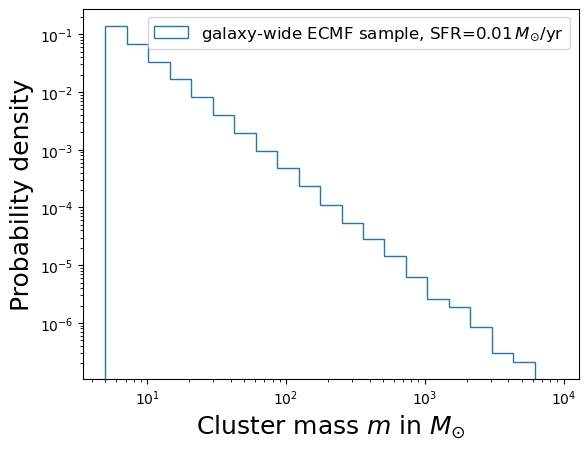

In [4]:
logbins=np.logspace(np.log10(np.min(M_ecl_i_array)),np.log10(np.max(M_ecl_i_array)), int(len(M_ecl_i_array)**(2/5)-1))
plt.hist(M_ecl_i_array, bins=logbins, density=True, label=r'galaxy-wide ECMF sample, SFR=$0.01\, M_{\odot}$/yr', histtype='step')
print('The ECMF slope of the drawn sample is', MLE_with_std(M_ecl_i_array)[0], '+/-', MLE_with_std(M_ecl_i_array)[1])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Cluster mass $m$ in $M_{\odot}$', size=18)
plt.ylabel(r'Probability density', size=18)
plt.legend(fontsize=12)

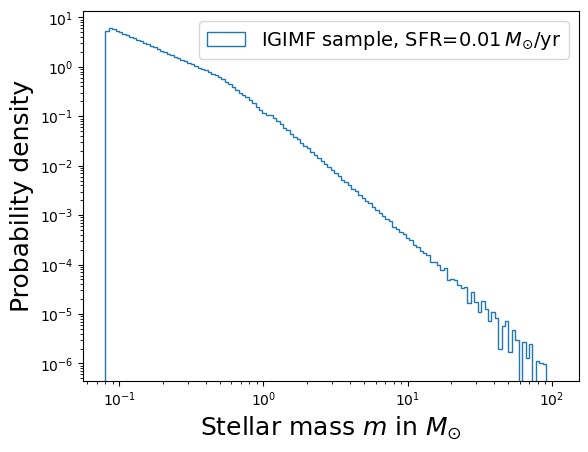

In [5]:
logbins=np.logspace(np.log10(np.min(mass_stars_array)),np.log10(np.max(mass_stars_array)), int(len(mass_stars_array)**(2/5)-1))
plt.hist(mass_stars_array, bins=logbins, density=True, label=r'IGIMF sample, SFR=$0.01\, M_{\odot}$/yr', histtype='step')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Stellar mass $m$ in $M_{\odot}$', size=18)
plt.ylabel(r'Probability density', size=18)
plt.legend(fontsize=14)

## Drawing custom cIMFs using empirical results for the found most massive cluster mass $M_1$ and $M_{\mathrm{tot}}$

One can draw any cIMF for any sub-galactic region, if its most massive cluster mass $M_1$ and total stellar mass $M_{\mathrm{tot}}$ is known. This can be used e.g. to investigate the dependence of local ECMFs on environment or other parameters to gain a better understanding of star-formation on sub-galactic scales.

To sample using this formulation, both inputs (M_tot and M_1) need to be unequal to zero.

Also, make sure that the combination of $M_1$ and $M_{\mathrm{tot}}$ chosen is actually feasible for the ECMF slope you use.

In [6]:
## Generate a cIMF with the Yan et al. 2021 stellar IMF model
## Choose a small star-formation rate
#SFR=0.01 ## solar masses/yr
M_tot=10**5
M_1=10000
## use a varying IMF
alpha_1_model='Z' 
alpha_2_model='Z'
alpha_3_model=2
## use e.g. a canonical ECMF (beta=2); beta_model=2 cannot be used here as it creates inconsistencies!
beta_model=0
M_over_H= 0 ## [Z] = [Z/Zsolar]
M_ecl_i_array, totalmass_ecl, num_clusters, kecl, beta, mass_stars_array, totalmass_stars, totalmass_array, num_stars, num_stars_array = draw_cIMF(alpha_1_model, alpha_2_model, alpha_3_model, beta_model, SFR, M_over_H, M_1, M_tot) 

M_tot and M_1 as input
All clusters drawn
Total mass of cluster: 9999.95592714003
Total mass of cluster: 5474.188301178875
Total mass of cluster: 3789.773061313737
Total mass of cluster: 2901.6406016425876
Total mass of cluster: 2351.746765584222
Total mass of cluster: 1977.358516011665
Total mass of cluster: 1706.021897356427
Total mass of cluster: 1500.272876250108
Total mass of cluster: 1338.7583362866367
Total mass of cluster: 1208.706552937424
Total mass of cluster: 1101.7135026893625
Total mass of cluster: 1012.1243617835758
Total mass of cluster: 935.9877993991512
Total mass of cluster: 870.5430958685433
Total mass of cluster: 813.6686876461489
Total mass of cluster: 763.7658295043323
Total mass of cluster: 719.630417552645
Total mass of cluster: 680.286861235416
Total mass of cluster: 645.0088157341002
Total mass of cluster: 613.2775516511439
Total mass of cluster: 584.5116893999076
Total mass of cluster: 558.2856164771454
Total mass of cluster: 534.3131123587026
Total mass of 

The ECMF slope of the drawn sample is 1.9997691614482647 +/- 0.014066568597496493


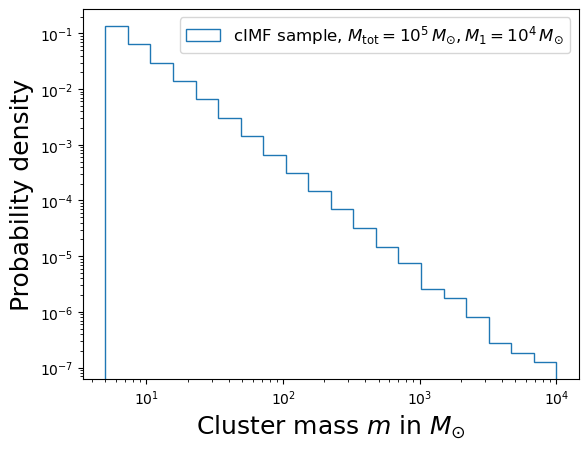

In [7]:
logbins=np.logspace(np.log10(np.min(M_ecl_i_array)),np.log10(np.max(M_ecl_i_array)), int(len(M_ecl_i_array)**(2/5)-1))
plt.hist(M_ecl_i_array, bins=logbins, density=True, label=r'cIMF sample, $M_{\mathrm{tot}}=10^5\, M_{\odot}, M_1=10^4\, M_{\odot}$', histtype='step')
print('The ECMF slope of the drawn sample is', MLE_with_std(M_ecl_i_array)[0], '+/-', MLE_with_std(M_ecl_i_array)[1])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Cluster mass $m$ in $M_{\odot}$', size=18)
plt.ylabel(r'Probability density', size=18)
plt.legend(fontsize=12)

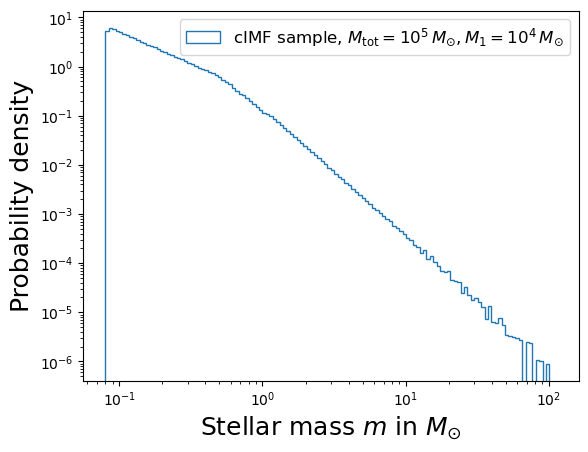

In [8]:
logbins=np.logspace(np.log10(np.min(mass_stars_array)),np.log10(np.max(mass_stars_array)), int(len(mass_stars_array)**(2/5)-1))
plt.hist(mass_stars_array, bins=logbins, density=True, label=r'cIMF sample, $M_{\mathrm{tot}}=10^5\, M_{\odot}, M_1=10^4\, M_{\odot}$', histtype='step')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Stellar mass $m$ in $M_{\odot}$', size=18)
plt.ylabel(r'Probability density', size=18)
plt.legend(fontsize=12)

## Drawing cIMFs from the most massive cluster mass $M_1$ within a region

This formulation can be used, if only $M_1$ is known.

This case may be useful e.g. for star-forming regions, where the most massive cluster mass within a region is known, as well as the local ECMF slope, but the mass/SFR of the region is uncertain. It could also be used to investigate how the physical upper limit $M_U$ could be modified for sub-galactic regions to fit local relations between total mass and most massive cluster mass.

To sample using this formulation, M_tot needs to be set to zero.

In [9]:
## Generate a cIMF using the Yan et al. 2021 stellar IMF model
## Choose a small star-formation rate
#SFR=0.01 ## solar masses/yr
M_tot=0
M_1=10000
## use a varying IMF
alpha_1_model='Z' 
alpha_2_model='Z'
alpha_3_model=2
## use e.g. a canonical ECMF (beta=2); beta_model=2 cannot be used here as it creates inconsistencies!
beta_model=0
M_over_H= 0 ## [Z] = [Z/Zsolar]
M_ecl_i_array, totalmass_ecl, num_clusters, kecl, beta, mass_stars_array, totalmass_stars, totalmass_array, num_stars, num_stars_array = draw_cIMF(alpha_1_model, alpha_2_model, alpha_3_model, beta_model, SFR, M_over_H, M_1, M_tot) 

M_tot=0 as input
M_tot,theo= 114946.65696722109
All clusters drawn
Total mass of cluster: 9999.956778905338
Total mass of cluster: 5849.626063679259
Total mass of cluster: 4150.332889086385
Total mass of cluster: 3219.3033945272823
Total mass of cluster: 2630.3042361750595
Total mass of cluster: 2223.923257051874
Total mass of cluster: 1926.4160578037254
Total mass of cluster: 1699.2044301297904
Total mass of cluster: 1520.0121382217967
Total mass of cluster: 1374.9678608654526
Total mass of cluster: 1255.3067685906215
Total mass of cluster: 1154.7445805141142
Total mass of cluster: 1069.1157504028968
Total mass of cluster: 995.3541784629406
Total mass of cluster: 931.0834251590788
Total mass of cluster: 874.5672545118721
Total mass of cluster: 824.5722103607684
Total mass of cluster: 779.9545740774394
Total mass of cluster: 739.9965000044068
Total mass of cluster: 703.8802454120586
Total mass of cluster: 671.1358752480991
Total mass of cluster: 641.2970811937657
Total mass of cluster:

In [10]:
print('The total stellar mass formed is:', totalmass_stars)

The total stellar mass formed is: 114826.54190348323


The ECMF slope of the drawn sample is 1.9997863709819557 +/- 0.013070614351264557


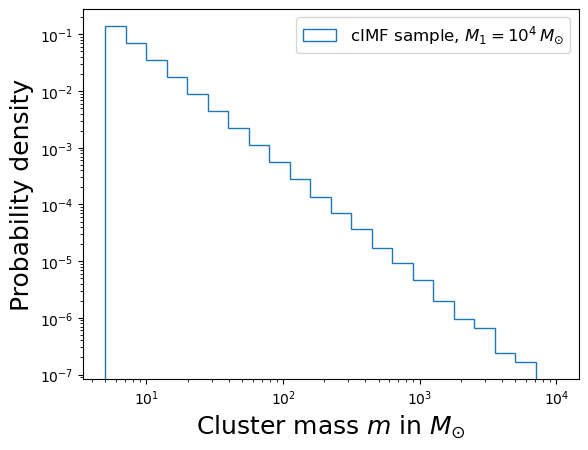

In [11]:
logbins=np.logspace(np.log10(np.min(M_ecl_i_array)),np.log10(np.max(M_ecl_i_array)), int(len(M_ecl_i_array)**(2/5)-1))
plt.hist(M_ecl_i_array, bins=logbins, density=True, label=r'cIMF sample, $M_1=10^4\, M_{\odot}$', histtype='step')
print('The ECMF slope of the drawn sample is', MLE_with_std(M_ecl_i_array)[0], '+/-', MLE_with_std(M_ecl_i_array)[1])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Cluster mass $m$ in $M_{\odot}$', size=18)
plt.ylabel(r'Probability density', size=18)
plt.legend(fontsize=12)

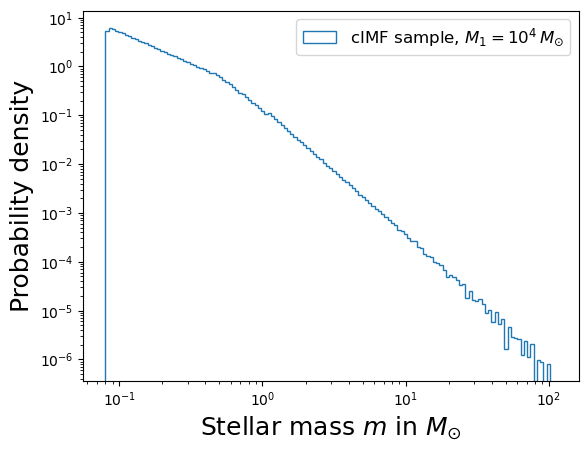

In [12]:
logbins=np.logspace(np.log10(np.min(mass_stars_array)),np.log10(np.max(mass_stars_array)), int(len(mass_stars_array)**(2/5)-1))
plt.hist(mass_stars_array, bins=logbins, density=True, label=r'cIMF sample, $M_1=10^4\, M_{\odot}$', histtype='step')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Stellar mass $m$ in $M_{\odot}$', size=18)
plt.ylabel(r'Probability density', size=18)
plt.legend(fontsize=12)